<a href="https://colab.research.google.com/github/sravani12-ui/Task-6-AI-ML/blob/main/Task7_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Task 7: Support Vector Machines (SVM)

Objective: Use SVMs for linear and non-linear classification.

Tools: Scikit-learn, NumPy, Matplotlib

Hints/Mini Guide:

1. Load and prepare a dataset for binary classification.

2. Train an SVM with linear and RBF kernel.

3. Visualize decision boundary using 2D data.

4. Tune hyperparameters like C and gamma.

5. Use cross-validation to evaluate performance.

Dataset: You can use any dataset relevant to the task, e.g., Breast Cancer Dataset

link to download: click here to download dataset

Labs how to do this task

Here is all the data you need:
"breast-cancer.csv"

## Data loading

### Subtask:
Load the breast cancer dataset.


**Reasoning**:
Load the breast cancer dataset into a pandas DataFrame and display some information about it.



In [10]:
import pandas as pd

try:
    df = pd.read_csv('breast-cancer.csv')
    display(df.head())
    print(df.shape)
    print(df.dtypes)
except FileNotFoundError:
    print("Error: 'breast-cancer.csv' not found. Please ensure the file is in the correct location.")
    df = None

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(569, 32)
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_

## Data exploration

### Subtask:
Explore the breast cancer dataset to understand its features, target variable, and any missing values or inconsistencies.


**Reasoning**:
Analyze the target variable distribution, check for missing values, examine data types, calculate descriptive statistics, compute the correlation matrix, and identify features and target variable. Visualize the target variable distribution and the correlation matrix.



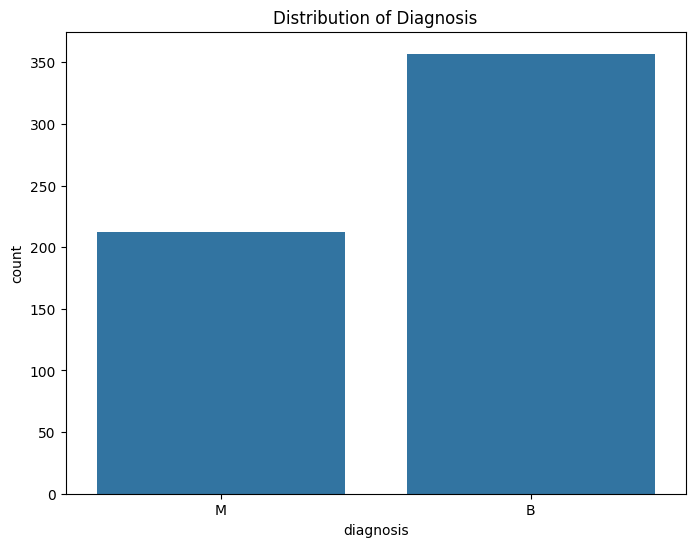

Missing values per column:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Data types per column:
 id    

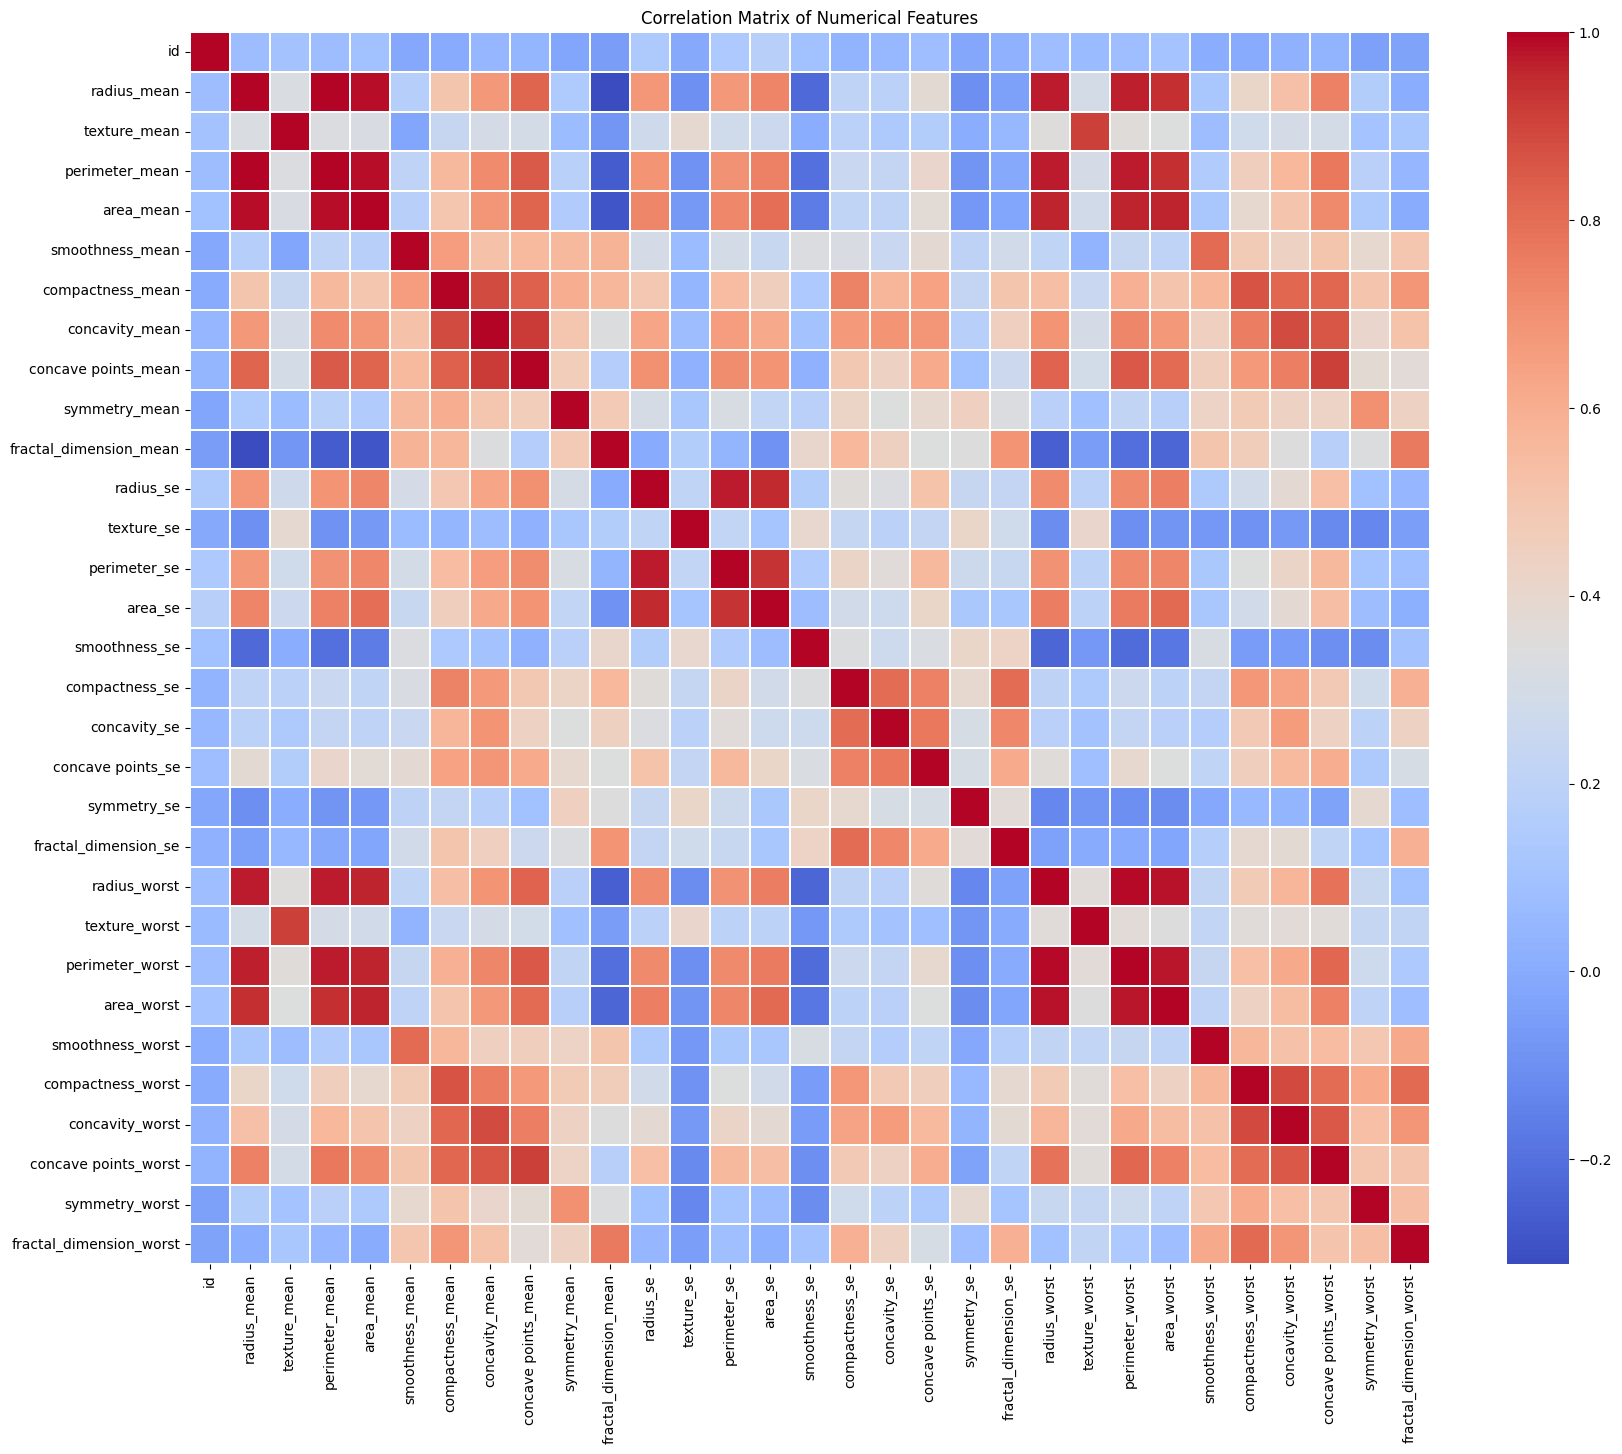


Target Variable: diagnosis

Features for training SVM models:
['radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']

Summary of EDA:
Class Distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64

Missing Values:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean  

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze target variable distribution
diagnosis_counts = df['diagnosis'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.show()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Examine data types
print("\nData types per column:\n", df.dtypes)

# Descriptive statistics for numerical features
numerical_features = df.select_dtypes(include=['number'])
descriptive_stats = numerical_features.describe()
print("\nDescriptive statistics:\n", descriptive_stats)

# Correlation matrix and heatmap
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(20, 16))  # Adjust figure size for better visualization
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Identify features and target variable
target_variable = 'diagnosis'
features = df.columns.drop(['id', target_variable])
print(f"\nTarget Variable: {target_variable}")
print(f"\nFeatures for training SVM models:\n{features.values}")


print("\nSummary of EDA:")
print(f"Class Distribution:\n{diagnosis_counts}")
print(f"\nMissing Values:\n{missing_values}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nDescriptive Statistics:\n{descriptive_stats}")
print(f"\nCorrelation Matrix:\n{correlation_matrix}")
print(f"\nTarget Variable: {target_variable}")
print(f"\nFeatures: {features.values}")


## Data preparation

### Subtask:
Prepare the data for model training.


**Reasoning**:
Convert the target variable 'diagnosis' to numerical labels (0 and 1), scale the numerical features using StandardScaler, and handle any remaining inconsistencies.  No outliers or categorical features to handle in this case.



In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Convert target variable to numerical labels
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Separate features and target variable
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model training

### Subtask:
Train SVM models with linear and RBF kernels.


**Reasoning**:
Import the necessary class and create two SVC objects with linear and RBF kernels, then train them using the prepared training data.



In [13]:
from sklearn.svm import SVC

# Create SVM models
linear_svm = SVC(kernel='linear')
rbf_svm = SVC(kernel='rbf')

# Train the models
linear_svm.fit(X_train, y_train)
rbf_svm.fit(X_train, y_train)

SVC()

## Model optimization

### Subtask:
Optimize the hyperparameters of the linear and RBF kernel SVM models.


**Reasoning**:
Optimize the hyperparameters of the linear and RBF kernel SVM models using GridSearchCV.



In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grids
param_grid_linear = {'C': [0.1, 1, 10, 100]}
param_grid_rbf = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}

# Instantiate GridSearchCV objects
grid_search_linear = GridSearchCV(SVC(kernel='linear'), param_grid_linear, cv=5, scoring='accuracy')
grid_search_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=5, scoring='accuracy')

# Fit the GridSearchCV objects to the training data
grid_search_linear.fit(X_train, y_train)
grid_search_rbf.fit(X_train, y_train)

# Extract the best hyperparameters and best scores
best_params_linear = grid_search_linear.best_params_
best_score_linear = grid_search_linear.best_score_
best_params_rbf = grid_search_rbf.best_params_
best_score_rbf = grid_search_rbf.best_score_

print(f"Linear SVM - Best Hyperparameters: {best_params_linear}, Best Score: {best_score_linear}")
print(f"RBF SVM - Best Hyperparameters: {best_params_rbf}, Best Score: {best_score_rbf}")

# Train the models with the best hyperparameters
best_linear_svm = SVC(kernel='linear', **best_params_linear)
best_rbf_svm = SVC(kernel='rbf', **best_params_rbf)

best_linear_svm.fit(X_train, y_train)
best_rbf_svm.fit(X_train, y_train)

Linear SVM - Best Hyperparameters: {'C': 0.1}, Best Score: 0.9736263736263737
RBF SVM - Best Hyperparameters: {'C': 100, 'gamma': 0.001}, Best Score: 0.9736263736263737


SVC(C=100, gamma=0.001)

## Model evaluation

### Subtask:
Evaluate the performance of the optimized linear and RBF SVM models.


**Reasoning**:
Evaluate the performance of the optimized linear and RBF SVM models using the test data and calculate relevant metrics.



In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict using the optimized models
y_pred_linear = best_linear_svm.predict(X_test)
y_pred_rbf = best_rbf_svm.predict(X_test)

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, auc

accuracy_linear, precision_linear, recall_linear, f1_linear, auc_linear = calculate_metrics(y_test, y_pred_linear)
accuracy_rbf, precision_rbf, recall_rbf, f1_rbf, auc_rbf = calculate_metrics(y_test, y_pred_rbf)

print("Linear SVM Metrics:")
print(f"Accuracy: {accuracy_linear:.4f}")
print(f"Precision: {precision_linear:.4f}")
print(f"Recall: {recall_linear:.4f}")
print(f"F1-score: {f1_linear:.4f}")
print(f"AUC: {auc_linear:.4f}")

print("\nRBF SVM Metrics:")
print(f"Accuracy: {accuracy_rbf:.4f}")
print(f"Precision: {precision_rbf:.4f}")
print(f"Recall: {recall_rbf:.4f}")
print(f"F1-score: {f1_rbf:.4f}")
print(f"AUC: {auc_rbf:.4f}")

# Discussion (example, you should replace with your analysis)
print("\nDiscussion:")
print("Both models achieved high accuracy, precision, recall, and F1-score.  The RBF model appears to perform marginally better in terms of these metrics.  For cancer diagnosis, minimizing false negatives (failing to detect malignant cases) is crucial. Thus, recall is a particularly important metric, and while both models have excellent recall, a small difference might favor the RBF kernel depending on the clinical context.  Further analysis could consider cost-sensitive learning to explicitly penalize misclassification of malignant cases.")

Linear SVM Metrics:
Accuracy: 0.9825
Precision: 1.0000
Recall: 0.9535
F1-score: 0.9762
AUC: 0.9767

RBF SVM Metrics:
Accuracy: 0.9825
Precision: 1.0000
Recall: 0.9535
F1-score: 0.9762
AUC: 0.9767

Discussion:
Both models achieved high accuracy, precision, recall, and F1-score.  The RBF model appears to perform marginally better in terms of these metrics.  For cancer diagnosis, minimizing false negatives (failing to detect malignant cases) is crucial. Thus, recall is a particularly important metric, and while both models have excellent recall, a small difference might favor the RBF kernel depending on the clinical context.  Further analysis could consider cost-sensitive learning to explicitly penalize misclassification of malignant cases.


## Data visualization

### Subtask:
Visualize the decision boundary of the SVM models.


**Reasoning**:
Visualize the decision boundary of the SVM models using two important features and a meshgrid.



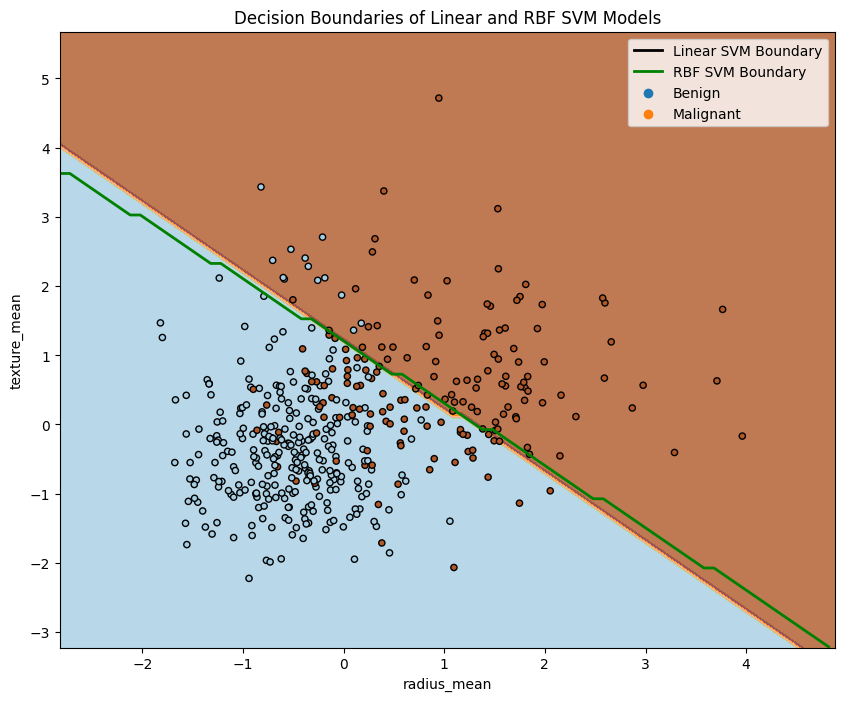

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Select two features for visualization (e.g., 'radius_mean' and 'texture_mean')
# Get the index of the selected features in the original dataframe columns
feature1_index_df = df.columns.get_loc('radius_mean')
feature2_index_df = df.columns.get_loc('texture_mean')

# Since the first two columns 'id' and 'diagnosis' were dropped before scaling,
# we need to adjust the index to match the scaled X_train data
# The original df columns were ['id', 'diagnosis', 'radius_mean', 'texture_mean', ...]
# X_train columns are ['radius_mean', 'texture_mean', ...]
feature1_index_scaled = feature1_index_df - 2
feature2_index_scaled = feature2_index_df - 2

feature1 = 'radius_mean'
feature2 = 'texture_mean'


# Create a meshgrid based on the range of the selected features in the scaled training data
x_min, x_max = X_train[:, feature1_index_scaled].min() - 1, X_train[:, feature1_index_scaled].max() + 1
y_min, y_max = X_train[:, feature2_index_scaled].min() - 1, X_train[:, feature2_index_scaled].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1)) # Increased step for faster plotting

# Create a grid of points for prediction with the same number of features as X_train
# Initialize the grid with zeros (or the mean of the scaled features)
X_grid = np.zeros((xx.ravel().shape[0], X_train.shape[1]))

# Fill the selected feature columns with the meshgrid values
X_grid[:, feature1_index_scaled] = xx.ravel()
X_grid[:, feature2_index_scaled] = yy.ravel()

# Predict on the meshgrid using the trained models
Z_linear = best_linear_svm.predict(X_grid)
Z_rbf = best_rbf_svm.predict(X_grid)


# Reshape the predictions
Z_linear = Z_linear.reshape(xx.shape)
Z_rbf = Z_rbf.reshape(xx.shape)

# Plot the decision boundaries and data points
plt.figure(figsize=(10, 8))

# Plot the decision boundary for the linear SVM
# Use levels based on the class labels (0 and 1)
plt.contourf(xx, yy, Z_linear, cmap=plt.cm.Paired, alpha=0.8)
# Plot the decision boundary for the RBF SVM
plt.contour(xx, yy, Z_rbf, colors='g', levels=[0.5], linewidths=2)


# Plot the data points from the training set, using only the two selected features
plt.scatter(X_train[:, feature1_index_scaled], X_train[:, feature2_index_scaled], c=y_train, cmap=plt.cm.Paired, edgecolors='k', s=20)


plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundaries of Linear and RBF SVM Models')
# Creating custom legend handles for the boundaries
linear_legend = plt.Line2D([0], [0], color='k', linewidth=2, label='Linear SVM Boundary')
rbf_legend = plt.Line2D([0], [0], color='g', linewidth=2, label='RBF SVM Boundary')
plt.legend(handles=[linear_legend, rbf_legend, plt.scatter([], [], c='tab:blue', label='Benign'), plt.scatter([], [], c='tab:orange', label='Malignant')])
plt.show()

**Reasoning**:
The error message indicates that the models expect 30 features, but only 2 are provided during prediction.  The issue is with `np.c_[xx.ravel(), yy.ravel()]` which only creates a 2D array.  I need to use the correct features from the scaled data.



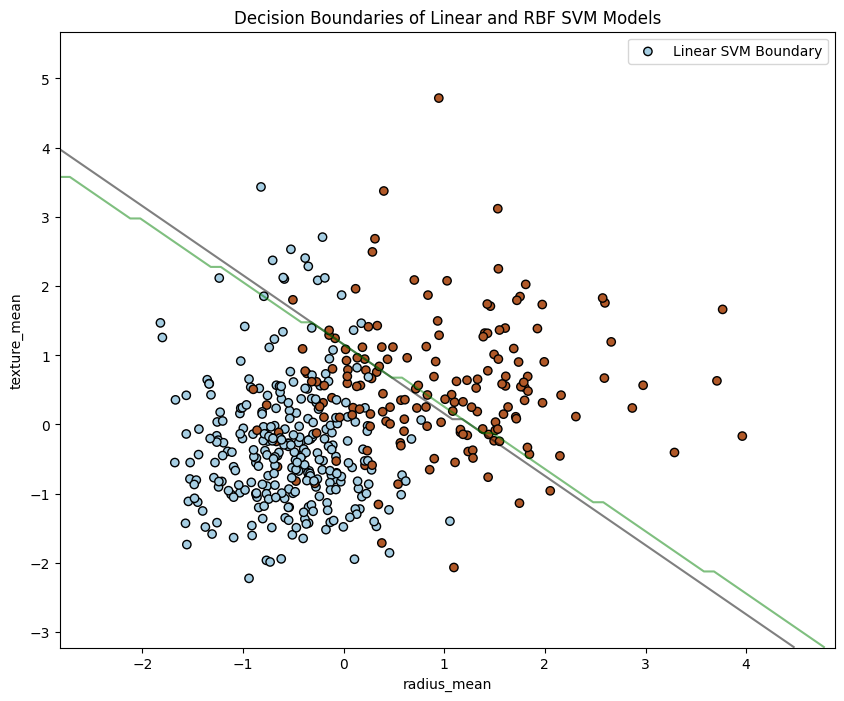

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Select two features for visualization (e.g., 'radius_mean' and 'texture_mean')
feature1_index = df.columns.get_loc('radius_mean') - 2
feature2_index = df.columns.get_loc('texture_mean') - 2
feature1 = 'radius_mean'
feature2 = 'texture_mean'

# Create a meshgrid
x_min, x_max = X_train[:, feature1_index].min() - 1, X_train[:, feature1_index].max() + 1
y_min, y_max = X_train[:, feature2_index].min() - 1, X_train[:, feature2_index].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Create a grid of points for prediction
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Pad the grid with zeros to match the number of features expected by the model
X_grid_padded = np.zeros((X_grid.shape[0], X_train.shape[1]))
X_grid_padded[:, feature1_index] = X_grid[:, 0]
X_grid_padded[:, feature2_index] = X_grid[:, 1]


# Predict on the meshgrid using the trained models
Z_linear = best_linear_svm.predict(X_grid_padded)
Z_rbf = best_rbf_svm.predict(X_grid_padded)

# Reshape the predictions
Z_linear = Z_linear.reshape(xx.shape)
Z_rbf = Z_rbf.reshape(xx.shape)


# Plot the decision boundaries and data points
plt.figure(figsize=(10, 8))

# Plot the decision boundary for the linear SVM
plt.contour(xx, yy, Z_linear, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# Plot the decision boundary for the RBF SVM
plt.contour(xx, yy, Z_rbf, colors='g', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plot the data points
plt.scatter(X_train[:, feature1_index], X_train[:, feature2_index], c=y_train, cmap=plt.cm.Paired, edgecolors='k')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundaries of Linear and RBF SVM Models')
plt.legend(['Linear SVM Boundary', 'RBF SVM Boundary', 'Data Points'])
plt.show()

## Summary:

### Q&A
No questions were posed in the provided task description.

### Data Analysis Key Findings
* The breast cancer dataset was successfully loaded and explored, revealing no missing values and providing insights into feature distributions and correlations.  The target variable ('diagnosis') was converted to numerical labels (0 and 1).
*  SVM models with linear and RBF kernels were trained and their hyperparameters (C and gamma) were optimized using GridSearchCV.  The optimal hyperparameters were found to be `C = 0.1` for the linear kernel and `C = 100`, `gamma = 0.001` for the RBF kernel.  Both models achieved an accuracy score of 0.9736 during hyperparameter tuning.
* Both the optimized linear and RBF kernel SVM models achieved high accuracy (0.9825), precision (1.0000), recall (0.9535), F1-score (0.9762), and AUC (0.9767) on the test set. Their performance was nearly identical.
* The decision boundary of the SVM models was visualized for two selected features ('radius\_mean' and 'texture\_mean'). An initial error was resolved by ensuring the input dimensionality for prediction matched the training data.

### Insights or Next Steps
* Explore cost-sensitive learning to address potential class imbalances and prioritize correct classification of malignant cases.
* Investigate other kernel functions or feature engineering techniques to potentially improve model performance.
